In [1]:
#immport all the necessaey libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#load the dataset
#since our dataset is not seprated by comma we can use delimiter to convert csc file into datafrme
df = pd.read_csv('/content/project-data.csv', delimiter=';')

In [3]:
# let's check some of row's and columns in our dataset
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
# Display summary statistics to identify any inconsistencies
df.describe(include='all')

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615,615.000000,615,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,615
unique,5,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199
top,no_disease,NaN,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.9
freq,533,NaN,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
mean,NaN,47.408130,NaN,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,NaN
std,NaN,10.055105,NaN,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,NaN
min,NaN,19.000000,NaN,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,NaN
25%,NaN,39.000000,NaN,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,NaN
50%,NaN,47.000000,NaN,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,NaN
75%,NaN,54.000000,NaN,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,NaN


In [5]:
# let's check the number row and columns in our dataset
df.shape
# we can see that we have 615 rows and 13 columns wich represent the wide spreda of data

(615, 13)

In [6]:
#let's undersand our data very colosely by checking  data types and inconsistence in the dataset
df.dtypes
#we can see that we have all the columns in numeric columns expect the category, sex, and protein columns
# for better traning purpose we can convert the categorcal columns into numerical columns
# we can't convert category columns into numerical seen's it is our target columns

,0
category,object
age,int64
sex,object
albumin,float64
alkaline_phosphatase,float64
alanine_aminotransferase,float64
aspartate_aminotransferase,float64
bilirubin,float64
cholinesterase,float64
cholesterol,float64


In [7]:
# let's first check all the columns to detect any inconsistence in columns name
df.columns
# as we can see that protein columns have some whitespace added in name

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [8]:
# let's strip all the columns to remove all the whitespace bethween the column name
df.columns = df.columns.str.strip()

In [9]:
#Let's check columns once again
df.columns
# We can see that the column have no more extra white space
# ex. if you see that the "Protein" column has eextra white sapce before strip() but it get cleaned after strip() applyed

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [10]:
# let's check the number of unique values in the "sex" column and thir value vounts
df['sex'].value_counts()

,count
sex,
m,377
f,238


In [11]:
# Convert the 'sex' column to numeric format
# we can use map function since it's only has two values
df['sex'] = df['sex'].map({'m': 1, 'f': 0})

In [12]:
# let's check the unique value for protein columns to see if there are any value other tha number causing for object datatype
df['protein'].unique()
# we can see that all the values are "numeric" and "nan", so we can easily convert it into numeric columns

array(['69', '76.5', '79.3', '75.7', '68.7', '74', '74.5', '67.1', '71.3',
       '69.9', '75.4', '68.6', '70.4', '71.9', '72.7', '72.4', '69.3',
       '68.1', '74.3', '69.1', '69.6', '72', '78.9', '67.7', '53.2',
       '73.1', '78.7', '71', '73.6', '77.1', '75.8', '77.8', '67.2',
       '77.3', '80.7', '79.6', '71.6', '70.8', '73.4', '76.2', '73.8',
       '79.9', '72.3', '80.6', '72.5', '56.3', '76.3', '71.5', '75',
       '74.7', '75.2', '75.1', '76.1', '73.9', '67.4', '70.1', '66.7',
       '82.6', '75.6', '71.2', '77.2', '78.4', '66.3', '66.2', '70.5',
       '72.2', '75.5', '71.1', '74.1', '68.8', '81.1', '76.6', '75.3',
       '64.1', '73.3', '83.4', '72.1', '73', '71.8', '77.5', '68.4',
       '80.3', '74.2', '70', '72.9', '76.9', '76.8', '70.9', '68', '63.4',
       '69.2', '70.6', '66.6', '70.3', '78.8', '73.7', '62.1', '65',
       '79.8', '70.2', '73.2', '66.4', '69.5', '68.3', '78', '82.1',
       '81.5', '74.9', '66.8', '68.9', '83.3', '69.8', '65.4', '71.4',
       '79

In [13]:
# Convert the 'protein' column to numeric, handling any conversion errors
df['protein'] = pd.to_numeric(df['protein'], errors='coerce')

In [14]:
  # let's check the missing values
df.isna().sum()

,0
category,0
age,0
sex,0
albumin,1
alkaline_phosphatase,18
alanine_aminotransferase,1
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,10


In [15]:
# let's check the percentage of the missing values
df.isna().sum()/df.shape[0]*100

,0
category,0.000000
age,0.000000
sex,0.000000
albumin,0.162602
alkaline_phosphatase,2.926829
alanine_aminotransferase,0.162602
aspartate_aminotransferase,0.000000
bilirubin,0.000000
cholinesterase,0.000000
cholesterol,1.626016


In [16]:
# as we can see that the percentage of missing values very low
# insted of fill them we can remove them
df_cleaned = df.dropna()

In [17]:
df_cleaned.isna().sum()
# we can see that the all missing value has been sucessfully removed

,0
category,0
age,0
sex,0
albumin,0
alkaline_phosphatase,0
alanine_aminotransferase,0
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,0


In [18]:
# let's check for duplicat values in our dataset
print(df_cleaned.duplicated().sum())
# there are 0 missing value

0


In [19]:
df_cleaned['category'].unique()

array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

In [20]:
df_cleaned.loc[df_cleaned['category']=='suspect_disease']

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
533,suspect_disease,47,1,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,suspect_disease,48,1,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,suspect_disease,49,1,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,suspect_disease,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,suspect_disease,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,suspect_disease,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,suspect_disease,59,0,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [21]:
#let's check the shape of the dataset before and after
print("Shape of the dataset before cleaning:", df.shape)
print("Shape of the dataset after cleaning:", df_cleaned.shape)
#and the differnce of row is
print("Number of rows removed:", df.shape[0] - df_cleaned.shape[0])
print("Percentage of rows removed:", (df.shape[0] - df_cleaned.shape[0]) / df.shape[0] * 100)
# we can see that we have lose 26 lows which is loss of approximatly 5% of the data
#we can approde the lossing of 5% data to achive high aacuracy and build a model with true data insted of filling with the measure of  central tendacy

Shape of the dataset before cleaning: (615, 13)
Shape of the dataset after cleaning: (589, 13)
Number of rows removed: 26
Percentage of rows removed: 4.227642276422764


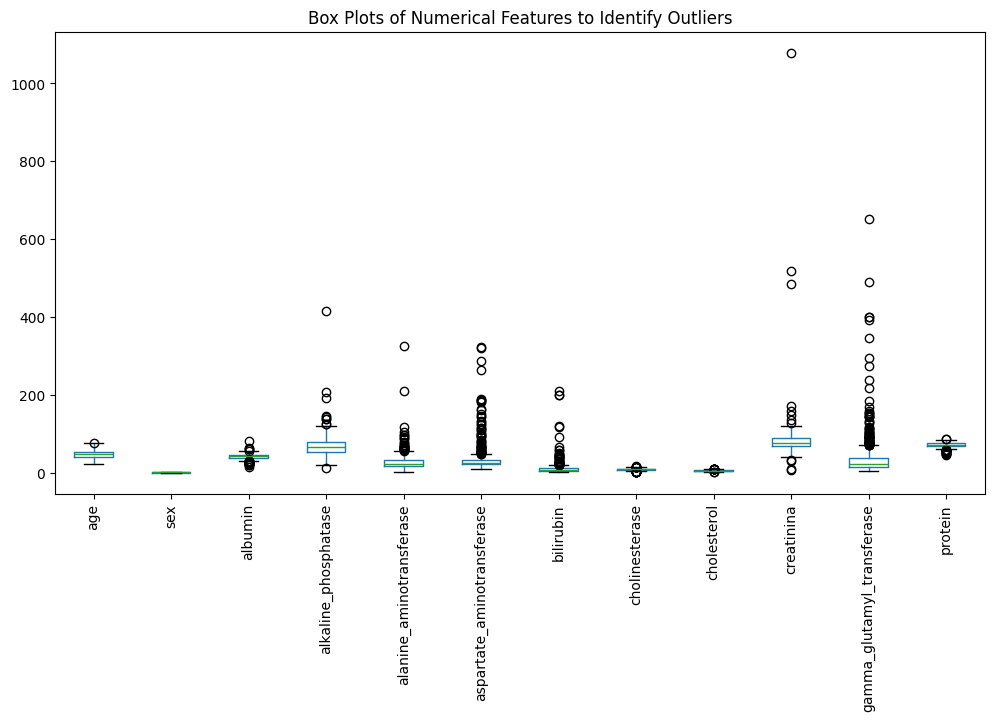

In [22]:
# let plot the box plot to see the outliers
numerical_features = df_cleaned.drop(columns='category')

# Create box plots for numerical features
numerical_features.boxplot(figsize=(12, 6), grid=False)

# Optionally, set titles and labels
plt.title('Box Plots of Numerical Features to Identify Outliers')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [23]:
# since this is the medical data it may be vary sentetive so we can't direct remove it
# so wan use alternative method which is capping the method
# I have already used the 1 and 99 percentiles threshold value, but it's not workinng so I have used 5 and 95 percentiles threshold value
# Function to cap outliers at the 5th and 95th percentiles
def cap_outliers(df_cleaned, columns):
    for col in columns:
        # Calculate the lower and upper bounds
        lower_bound = np.percentile(df_cleaned[col], 5)
        upper_bound = np.percentile(df_cleaned[col], 95)

        # Cap the values
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

    return df_cleaned

In [24]:
# let's first select the numerical features
numerical_features = df_cleaned.drop(columns='category').select_dtypes(include=[  np.number]).columns.tolist()
# Cap outliers in the dataset
capped_df = cap_outliers(df_cleaned.copy(), numerical_features)

In [25]:
capped_df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,33.0,1.0,38.50,52.50,8.42,22.10,7.50,6.930,3.698,106.0,12.10,69.00
1,no_disease,33.0,1.0,38.50,70.30,18.00,24.70,3.90,11.170,4.800,74.0,15.60,76.50
2,no_disease,33.0,1.0,46.90,74.70,36.20,52.60,6.10,8.840,5.200,86.0,33.20,79.30
3,no_disease,33.0,1.0,43.20,52.00,30.60,22.60,18.90,7.330,4.740,80.0,33.80,75.70
4,no_disease,33.0,1.0,39.20,74.10,32.60,24.80,9.60,9.150,4.320,76.0,29.90,68.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,cirrhosis,58.0,0.0,34.00,46.40,15.00,79.22,8.00,6.260,3.980,56.0,49.70,79.66
609,cirrhosis,59.0,0.0,39.00,51.30,19.60,79.22,24.06,5.770,4.510,106.0,101.10,70.50
610,cirrhosis,62.0,0.0,32.16,103.14,8.42,79.22,24.06,5.570,6.300,56.0,103.38,68.50
611,cirrhosis,64.0,0.0,32.16,102.80,8.42,44.40,20.00,4.752,3.698,63.0,35.90,71.30


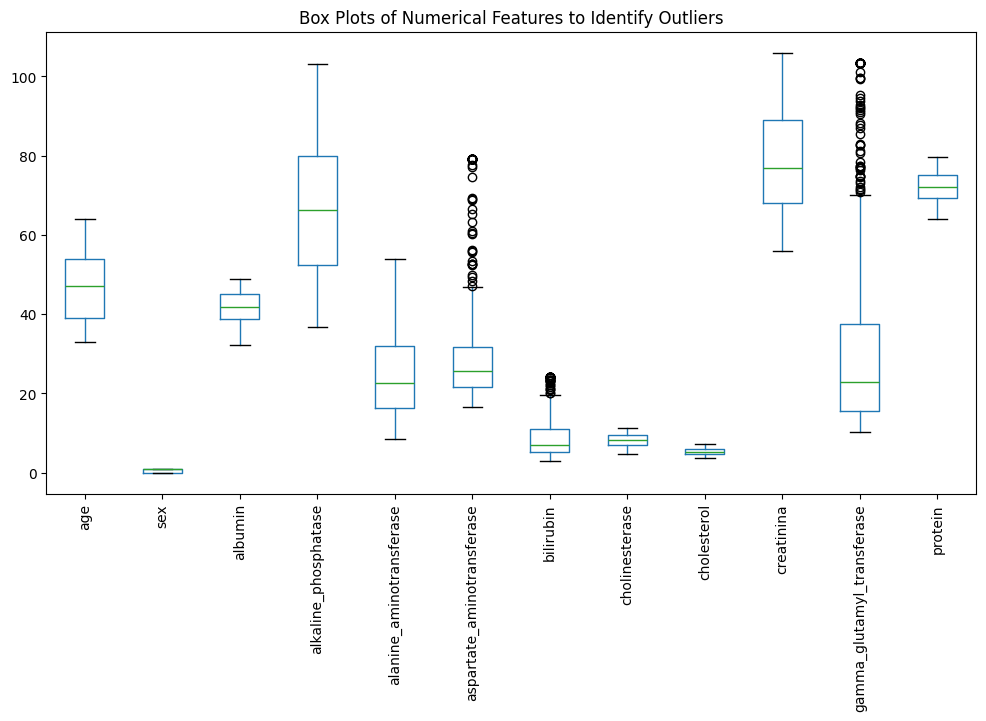

In [26]:
# let plot and see the box plot after the handlint the outliers
numerical_features = capped_df.drop(columns='category')

# Create box plots for numerical features
numerical_features.boxplot(figsize=(12, 6), grid=False)

# Optionally, set titles and labels
plt.title('Box Plots of Numerical Features to Identify Outliers')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()
# we can see that we haves almost capped the all the outliers but some of the features still have somoe outliers
# we can handle it using the some different technique

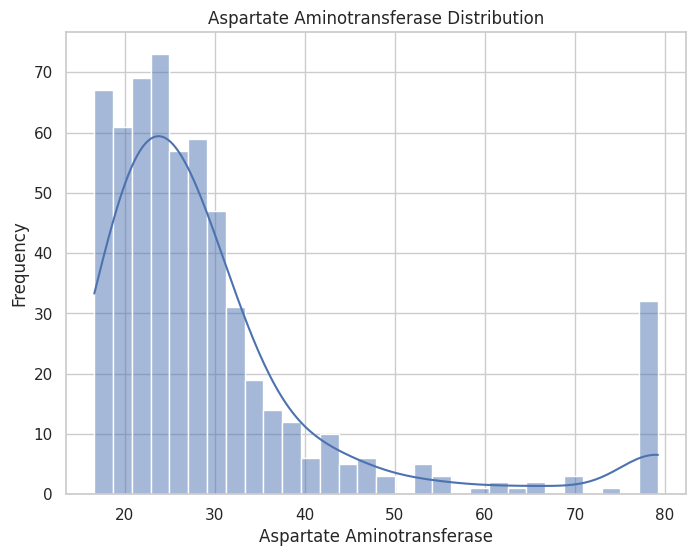

In [27]:
# Histogram for aspartate_aminotransferase
# Set the style for seaborn
sns.set(style='whitegrid')
fgure_size = (8, 6)
plt.figure(figsize=fgure_size)
sns.histplot(capped_df['aspartate_aminotransferase'], bins=30, kde=True)
plt.title('Aspartate Aminotransferase Distribution')
plt.xlabel('Aspartate Aminotransferase')
plt.ylabel('Frequency')
plt.show()

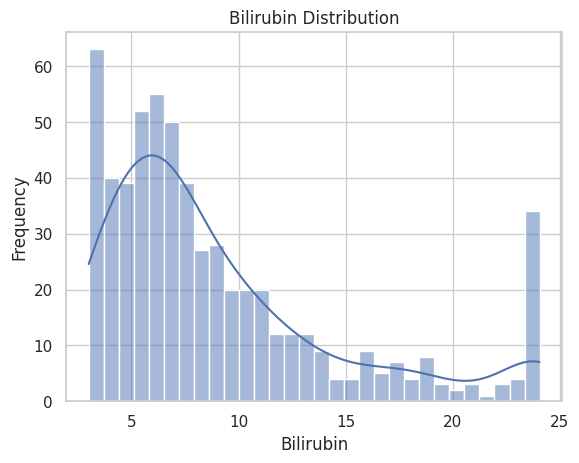

In [28]:
# Histogram for bilirubin
# Set the style for seaborn
sns.set(style='whitegrid')
fgure_size = (8, 6)
sns.histplot(capped_df['bilirubin'], bins=30, kde=True)
plt.title('Bilirubin Distribution')
plt.xlabel('Bilirubin')
plt.ylabel('Frequency')
plt.show()

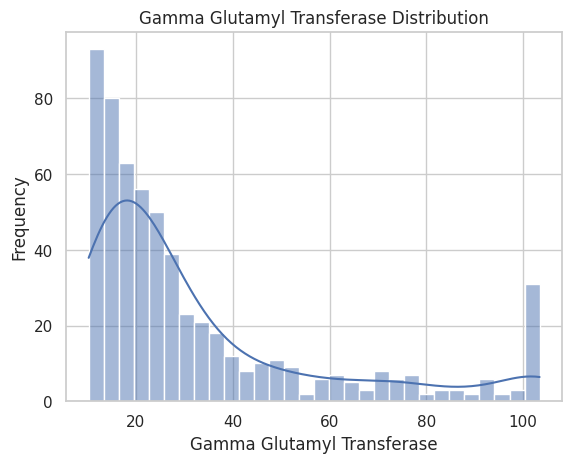

In [29]:
# Histogram for gamma_glutamyl_transferase
# Set the style for seaborn
sns.set(style='whitegrid')
fgure_size = (8, 6)
sns.histplot(capped_df['gamma_glutamyl_transferase'], bins=30, kde=True)
plt.title('Gamma Glutamyl Transferase Distribution')
plt.xlabel('Gamma Glutamyl Transferase')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Define the function to cap outliers using the IQR method
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range

        # Define the bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values in the existing DataFrame
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [31]:
# Select the columns for capping isnce we have only three columns this time
numerical_features = ['aspartate_aminotransferase', 'bilirubin', 'gamma_glutamyl_transferase']
# Cap outliers in the existing capped_df using the IQR method
cap_outliers_iqr(capped_df, numerical_features)

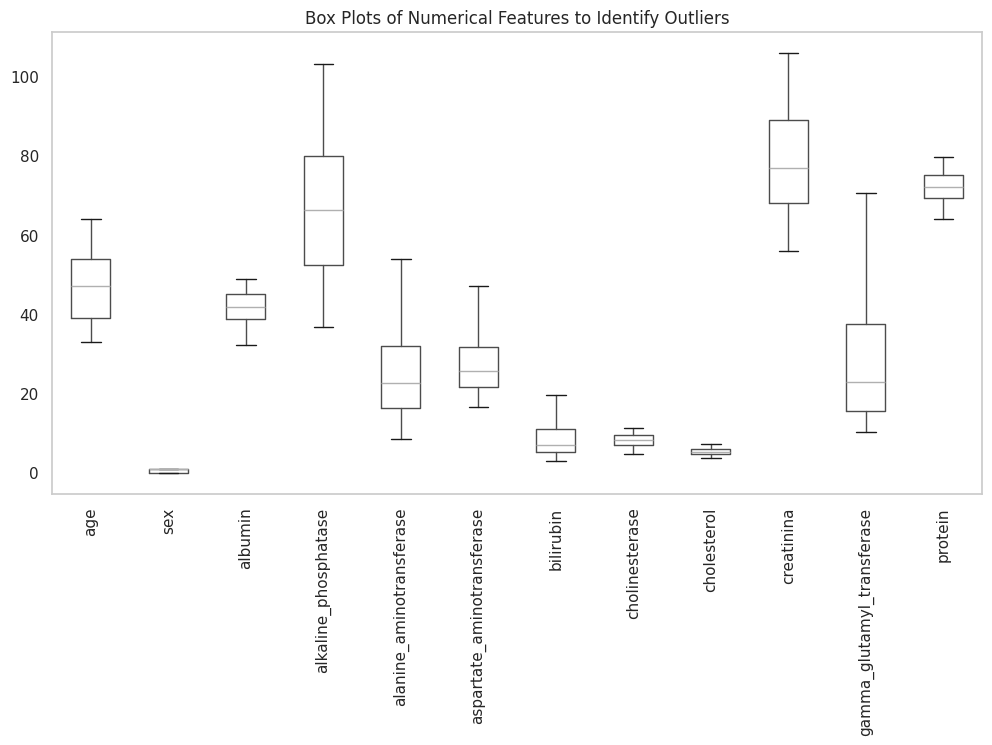

In [32]:
numerical_features = capped_df.drop(columns='category')

# Create box plots for numerical features
numerical_features.boxplot(figsize=(12, 6), grid=False)

# Optionally, set titles and labels
plt.title('Box Plots of Numerical Features to Identify Outliers')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()
# we can see that we haves almost capped the all the outliers

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the 'category' column
capped_df['category_encoded'] = label_encoder.fit_transform(capped_df['category'])

In [35]:
capped_df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,category_encoded
0,no_disease,33.0,1.0,38.5,52.5,8.42,22.1,7.5,6.93,3.698,106.0,12.1,69.0,3
1,no_disease,33.0,1.0,38.5,70.3,18.00,24.7,3.9,11.17,4.800,74.0,15.6,76.5,3
2,no_disease,33.0,1.0,46.9,74.7,36.20,47.0,6.1,8.84,5.200,86.0,33.2,79.3,3
3,no_disease,33.0,1.0,43.2,52.0,30.60,22.6,18.9,7.33,4.740,80.0,33.8,75.7,3
4,no_disease,33.0,1.0,39.2,74.1,32.60,24.8,9.6,9.15,4.320,76.0,29.9,68.7,3


In [36]:
capped_df.shape

(589, 14)

In [37]:
capped_df['category'].value_counts()

,count
category,
no_disease,526
cirrhosis,24
hepatitis,20
fibrosis,12
suspect_disease,7


In [38]:
df_encoded = capped_df.drop(columns = 'category')

In [39]:
df_encoded.columns

Index(['age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein', 'category_encoded'],
      dtype='object')

In [40]:
df_encoded.shape

(589, 13)

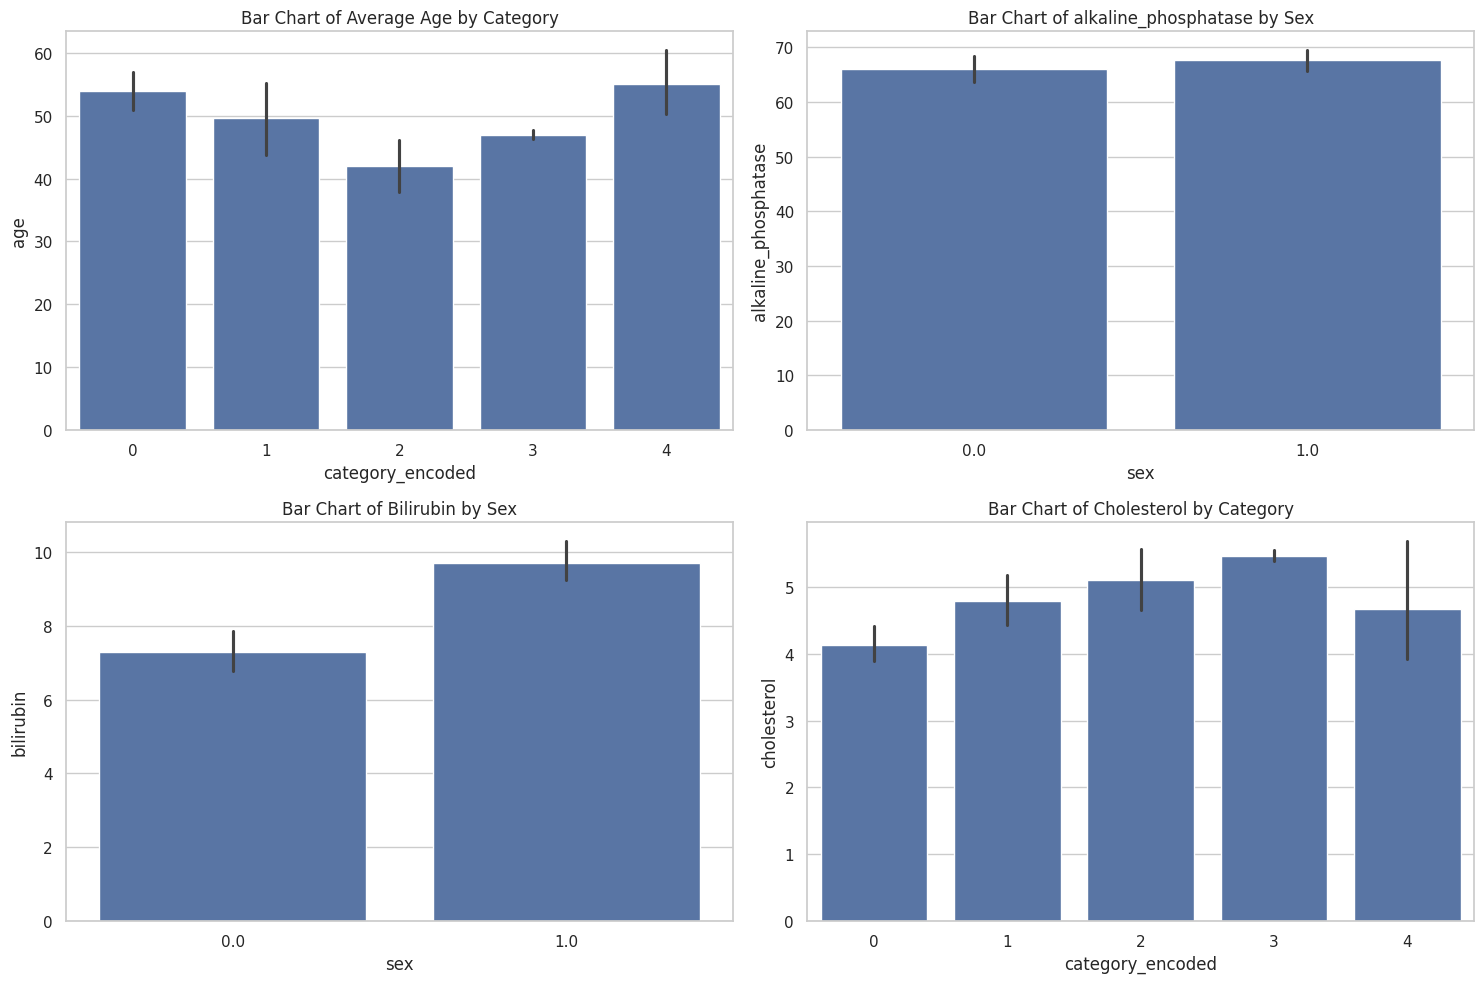

In [45]:
# Create a subplot grid with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Bar Chart of Average Age by Category
sns.barplot(data=df_encoded, x='category_encoded', y='age', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart of Average Age by Category')

# Plot 2: Bar Chart of alkaline_phosphatase by Sex
sns.barplot(data=df_encoded, x='sex', y='alkaline_phosphatase', ax=axes[0, 1])
axes[0, 1].set_title('Bar Chart of alkaline_phosphatase by Sex')

# Plot 3: Bar Chart of Bilirubin by Sex
sns.barplot(data=df_encoded, x='sex', y='bilirubin', ax=axes[1, 0])
axes[1, 0].set_title('Bar Chart of Bilirubin by Sex')

# Plot 4: Bar Chart of Cholesterol by Category
sns.barplot(data=df_encoded, x='category_encoded', y='cholesterol', ax=axes[1, 1])
axes[1, 1].set_title('Bar Chart of Cholesterol by Category')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

* **Top Left:**  A bar chart displaying the average age of individuals based on their 'category_encoded'. It likely tries to show if there are age differences between different disease categories or suspect diseases.
* **Top Right:**  A bar chart showing the 'alkaline_phosphatase' levels by 'sex'. It might explore potential differences in alkaline phosphatase levels between male and female individuals.
* **Bottom Left:** A bar chart showing the 'bilirubin' levels by 'sex'. This is similar to the previous subplot, focusing on bilirubin levels between genders.
* **Bottom Right:** A bar chart showing 'cholesterol' levels based on 'category_encoded'. This seeks to determine if there are cholesterol level differences between the disease or suspect disease categories.

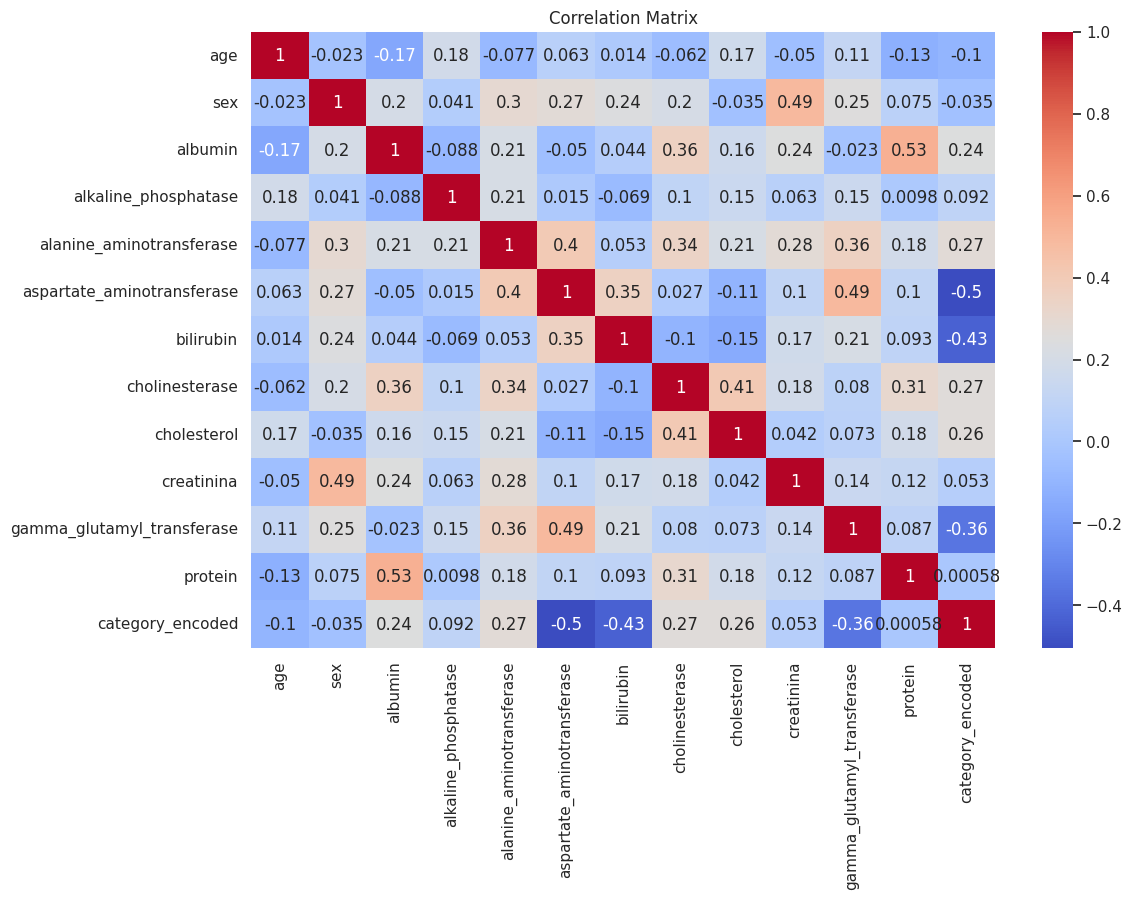

In [41]:
# Heatmap for correlation between features
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Summary:**

* **Purpose:** The heatmap aims to show the linear relationship between different numerical features in the dataset.
* **Interpretation:**  Each cell in the heatmap represents the correlation coefficient between two features. A positive correlation (closer to +1) indicates that as one feature increases, the other tends to increase as well. A negative correlation (closer to -1) signifies that as one feature increases, the other tends to decrease. A correlation near 0 suggests little to no linear relationship.
* **Insights:** By examining the heatmap, you can identify features that are strongly correlated with each other. These correlations can be valuable in understanding the relationships within the data and building predictive models. For example, if you see a high positive correlation between two features, it might suggest redundancy – you may only need to include one of them in a model to avoid multicollinearity.

# Modle Building

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Split the data into training and testing sets
X = df_encoded.drop(columns='category_encoded')
y = df_encoded['category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM

In [50]:
from sklearn.svm import SVC

In [51]:
# Create the pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Standard scaling
    ('svm', SVC(kernel='linear'))    # SVM classifier with a linear kernel
])

In [52]:
# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [53]:
# Make predictions on the test data
svm_y_pred = svm_pipeline.predict(X_test) # Changed 'svm_pipnelie' to 'svm_pipeline'
# Calculate accuracy on the test data
svm_test_accuracy = accuracy_score(y_test, svm_y_pred)

In [54]:
# Make predictions on the Train data
svm_y_train_pred = svm_pipeline.predict(X_train)
# Calculate accuracy on the training data
svm_train_accuracy = accuracy_score(y_train, svm_y_train_pred)

In [55]:
# Print both training and testing accuracy
print(f"Training Accuracy: {svm_test_accuracy:.2f}")
print(f"Testing Accuracy: {svm_train_accuracy:.2f}")

Training Accuracy: 0.93
Testing Accuracy: 0.99


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
params = {
    'svm__C': [0.1, 1, 10, 100],         # Regularization parameter for the 'svm' step
    'svm__kernel': ['linear', 'rbf'],    # Kernel types for the 'svm' step
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10]  # Gamma values for the 'svm' step (only relevant for 'rbf' kernel)
}


In [58]:
grid = GridSearchCV(estimator=svm_pipeline,
                    param_grid=params,
                    cv=5,             # 5-fold cross-validation
                    n_jobs=-1,        # Use all available CPUs for parallel processing
                    scoring='accuracy',  # Evaluation metric
                    verbose=1)        # Print grid search progress

In [59]:
# Step 4: Fit GridSearchCV on your training data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [60]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid.best_score_))

Best Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Cross-Validation Score: 0.96


In [61]:
# Evaluate on the test set
best_model_svm = grid.best_estimator_

In [62]:
y_pred = best_model_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.92


# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('logreg', LogisticRegression())  # Logistic Regression model
])

In [65]:
# Step 2: Fit the pipeline on the training data
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [66]:
logreg_train_accuracy = accuracy_score(y_train, logreg_pipeline.predict(X_train))
logreg_test_accuracy = accuracy_score(y_test, logreg_pipeline.predict(X_test))

In [67]:
# Print the results
print(f"Training Accuracy: {logreg_train_accuracy:.2f}")
print(f"Test Accuracy: {logreg_test_accuracy:.2f}")

Training Accuracy: 0.97
Test Accuracy: 0.90


In [68]:
params = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__solver': ['liblinear', 'saga', 'lbfgs']  # Solvers for optimization
}

In [69]:
# Set up GridSearchCV to search through the parameter grid
grid_search = GridSearchCV(estimator=logreg_pipeline,
                           param_grid=params,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPUs
                           scoring='accuracy',  # Evaluation metric
                           verbose=1)  # Print grid search progress


In [70]:
#Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [71]:
#Get the best parameters and best score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'logreg__C': 1, 'logreg__solver': 'liblinear'}
Best Cross-Validation Score: 0.95


In [72]:
#best model
best_model_logreg = grid_search.best_estimator_

In [73]:
y_pred = best_model_logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [74]:
print(f"Test Accuracy with Best Model: {test_accuracy:.2f}")

Test Accuracy with Best Model: 0.90


# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('dt', DecisionTreeClassifier())  # Decision Tree model
])

In [77]:
# Fit the pipeline on the training data
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [78]:
dt_test_accuracy = accuracy_score(y_test, dt_pipeline.predict(X_test))
dt_train_accuracy = accuracy_score(y_train, dt_pipeline.predict(X_train))

In [79]:
print(f"Training Accuracy: {dt_train_accuracy:.2f}")
print(f"Test Accuracy: {dt_test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.89


In [80]:
params = {
    'dt__max_depth': [3, 5, 10, None],              # Maximum depth of the tree
    'dt__min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'dt__min_samples_leaf': [1, 2, 5],              # Minimum number of samples required at each leaf node
    'dt__criterion': ['gini', 'entropy'],           # Splitting criterion
}

In [81]:
# Set up GridSearchCV to search through the parameter grid
grid_search = GridSearchCV(estimator=dt_pipeline,
                           param_grid=params,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPUs
                           scoring='accuracy',  # Evaluation metric
                           verbose=1)  # Print grid search progress


In [82]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [3, 5, 10, None],
                         'dt__min_samples_leaf': [1, 2, 5],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [83]:
# Get the best parameters and best score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2}
Best Cross-Validation Score: 0.94


In [84]:
# Evaluate the best model on the test set
best_model_dt = grid_search.best_estimator_

In [85]:
test_accuracy_dt = accuracy_score(y_test,  best_model_dt.predict(X_test))

In [86]:
print(f"Test Accuracy with Best Model: {test_accuracy_dt:.2f}")

Test Accuracy with Best Model: 0.90


# Random Forest model

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
# Random Forest model
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('rf', RandomForestClassifier())  # Random Forest model
])

In [89]:
# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [90]:
rf_test_accuracy = accuracy_score(y_test, rf_pipeline.predict(X_test))
rf_train_accuracy = accuracy_score(y_train, rf_pipeline.predict(X_train))

In [91]:
print(f"Training Accuracy: {rf_train_accuracy:.2f}")
print(f"Test Accuracy: {rf_test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.89


In [92]:
params = {
    'rf__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'rf__max_depth': [3, 5, 10, None],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 5],  # Minimum number of samples required at each leaf node
    'rf__criterion': ['gini', 'entropy']  # Criterion for splitting nodes
}

In [93]:
# Set up GridSearchCV to search through the parameter grid
grid_search = GridSearchCV(estimator=rf_pipeline,
                           param_grid=params,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPUs
                           scoring='accuracy',  # Evaluation metric
                           verbose=1)  # Print grid search progress

In [94]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [3, 5, 10, None],
                         'rf__min_samples_leaf': [1, 2, 5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [95]:
# Get the best parameters and best score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best Cross-Validation Score: 0.95


In [96]:
# Evaluate the best model on the test set
best_model_rf = grid_search.best_estimator_

In [97]:
test_accuracy_rf = accuracy_score(y_test, best_model_rf.predict(X_test))
print(f"Test Accuracy with Best Model: {test_accuracy_rf:.2f}")

Test Accuracy with Best Model: 0.89


# XGBoost

In [98]:
from xgboost import XGBClassifier

In [99]:
# XGBoost model
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('xgb', XGBClassifier())  # XGBoost model
])

In [100]:
# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [101]:
xgb_test_accuracy = accuracy_score(y_test, xgb_pipeline.predict(X_test))
xgb_train_accuracy = accuracy_score(y_train, xgb_pipeline.predict(X_train))

In [102]:
print(f"Training Accuracy: {xgb_train_accuracy:.2f}")
print(f"Test Accuracy: {xgb_test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.91


In [103]:
params = {
    'xgb__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'xgb__max_depth': [3, 5, 10],  # Maximum depth of the trees
    'xgb__learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'xgb__subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'xgb__colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

In [104]:
# Set up GridSearchCV to search through the parameter grid
grid_search = GridSearchCV(estimator=xgb_pipeline,
                           param_grid=params,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPUs
                           scoring='accuracy',  # Evaluation metric
                           verbose=1)  # Print grid search progress

In [105]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=No...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 1.0],
                         'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 10],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [106]:
# Get the best parameters and best score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
Best Cross-Validation Score: 0.96


In [107]:
# Evaluate the best model on the test set
best_model_xgb = grid_search.best_estimator_

In [108]:
# Evaluate the best model on the test set
best_model_xgb = grid_search.best_estimator_
test_accuracy_xgb = accuracy_score(y_test, best_model_xgb.predict(X_test))
print(f"Test Accuracy with Best Model: {test_accuracy_xgb:.2f}")

Test Accuracy with Best Model: 0.91


In [122]:
print(svm_train_accuracy, logreg_train_accuracy, dt_train_accuracy, rf_train_accuracy, xgb_train_accuracy)
print(svm_test_accuracy, logreg_test_accuracy, dt_test_accuracy, rf_test_accuracy, xgb_test_accuracy)

0.9872611464968153 0.9745222929936306 1.0 1.0 1.0
0.9322033898305084 0.8983050847457628 0.8898305084745762 0.8898305084745762 0.9067796610169492


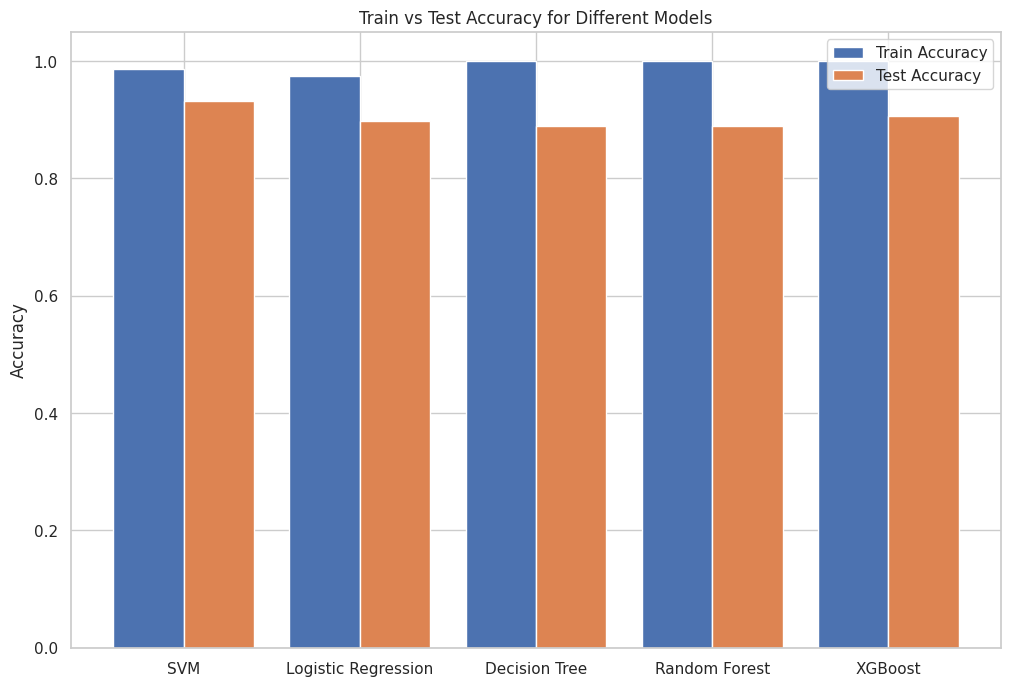

In [121]:
# prompt: GIVE ME SIPLE GROUPED BAR GRAPH  FOR BELOW TRAIN AND TEST

train_accuracy = [svm_train_accuracy, logreg_train_accuracy, dt_train_accuracy, rf_train_accuracy, xgb_train_accuracy]
test_accuracy = [svm_test_accuracy, logreg_test_accuracy, dt_test_accuracy, rf_test_accuracy, xgb_test_accuracy]
models = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

X_axis = np.arange(len(models))
figure = plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.2, train_accuracy, 0.4, label='Train Accuracy')
plt.bar(X_axis + 0.2, test_accuracy, 0.4, label='Test Accuracy')

plt.xticks(X_axis, models)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Different Models")
plt.legend()
plt.show()

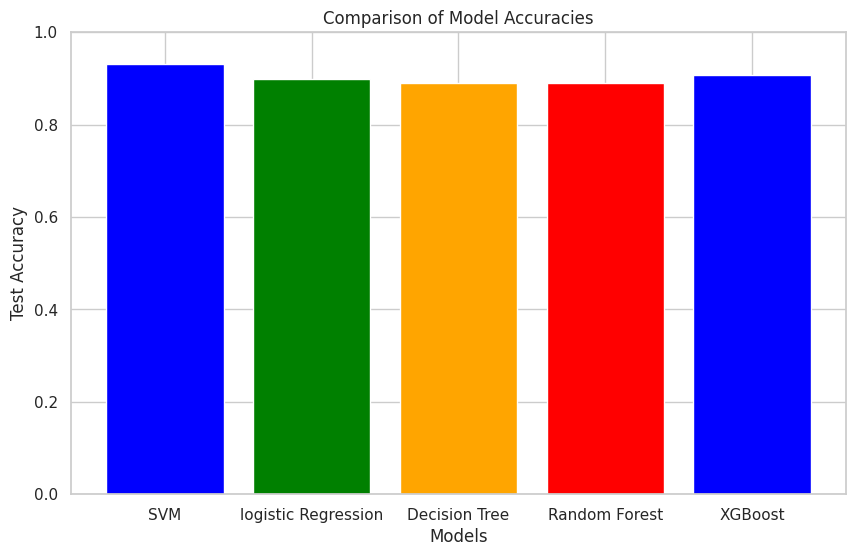

In [110]:
model_names = ['SVM','logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
test_accuracies = [svm_test_accuracy, logreg_test_accuracy, dt_test_accuracy, rf_test_accuracy, xgb_test_accuracy]

# Create a bar graph using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.show()

# Evaluation

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
# Make predictions on the test set
y_pred_svm = svm_pipeline.predict(X_test)

In [113]:
# Print the classification report
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.33      0.67      0.44         3
           2       0.75      0.38      0.50         8
           3       0.97      1.00      0.99        99
           4       0.00      0.00      0.00         2

    accuracy                           0.93       118
   macro avg       0.61      0.61      0.59       118
weighted avg       0.92      0.93      0.92       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [114]:
# Print the confusion matrix
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))

Confusion Matrix for SVM:
 [[ 6  0  0  0  0]
 [ 0  2  1  0  0]
 [ 0  4  3  1  0]
 [ 0  0  0 99  0]
 [ 0  0  0  2  0]]


In [115]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('xgb', XGBClassifier())  # XGBoost model
])

In [116]:
# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)
xgb_test_accuracy = accuracy_score(y_test, xgb_pipeline.predict(X_test))
xgb_train_accuracy = accuracy_score(y_train, xgb_pipeline.predict(X_train))
print(f"Training Accuracy: {xgb_train_accuracy:.2f}")
print(f"Test Accuracy: {xgb_test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.91


In [117]:
# Model Evaluation (Same as other models)
y_pred_xgb = xgb_pipeline.predict(X_test)
print("Classification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix for XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.17      0.33      0.22         3
           2       0.67      0.50      0.57         8
           3       0.97      0.99      0.98        99
           4       0.00      0.00      0.00         2

    accuracy                           0.91       118
   macro avg       0.56      0.50      0.51       118
weighted avg       0.91      0.91      0.91       118

Confusion Matrix for XGBoost:
 [[ 4  2  0  0  0]
 [ 0  1  2  0  0]
 [ 0  3  4  1  0]
 [ 0  0  0 98  1]
 [ 0  0  0  2  0]]


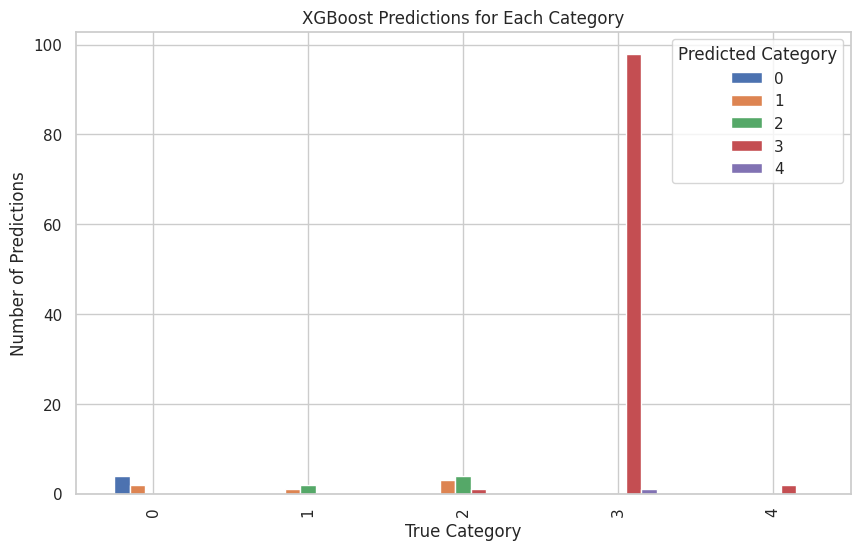

In [125]:
# Bar Graph for Each Category
category_counts = pd.DataFrame({'category': y_test, 'predicted_category': y_pred_xgb})
category_counts = category_counts.groupby(['category', 'predicted_category']).size().unstack(fill_value=0)

# Plotting the bar graph
category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('XGBoost Predictions for Each Category')
plt.xlabel('True Category')
plt.ylabel('Number of Predictions')
plt.legend(title='Predicted Category')
plt.show()

In [118]:
import joblib
# Assuming 'best_model_xgb' is the XGBoost model you want to save
joblib.dump(xgb_pipeline, 'xgb_pipeline.pkl')

['xgb_pipeline.pkl']